--- original sin ---
0.7071067811865476
variable(0.7071067811865476)
--- approximate sin ---
0.7071064695751781
variable(0.7071032148228457)


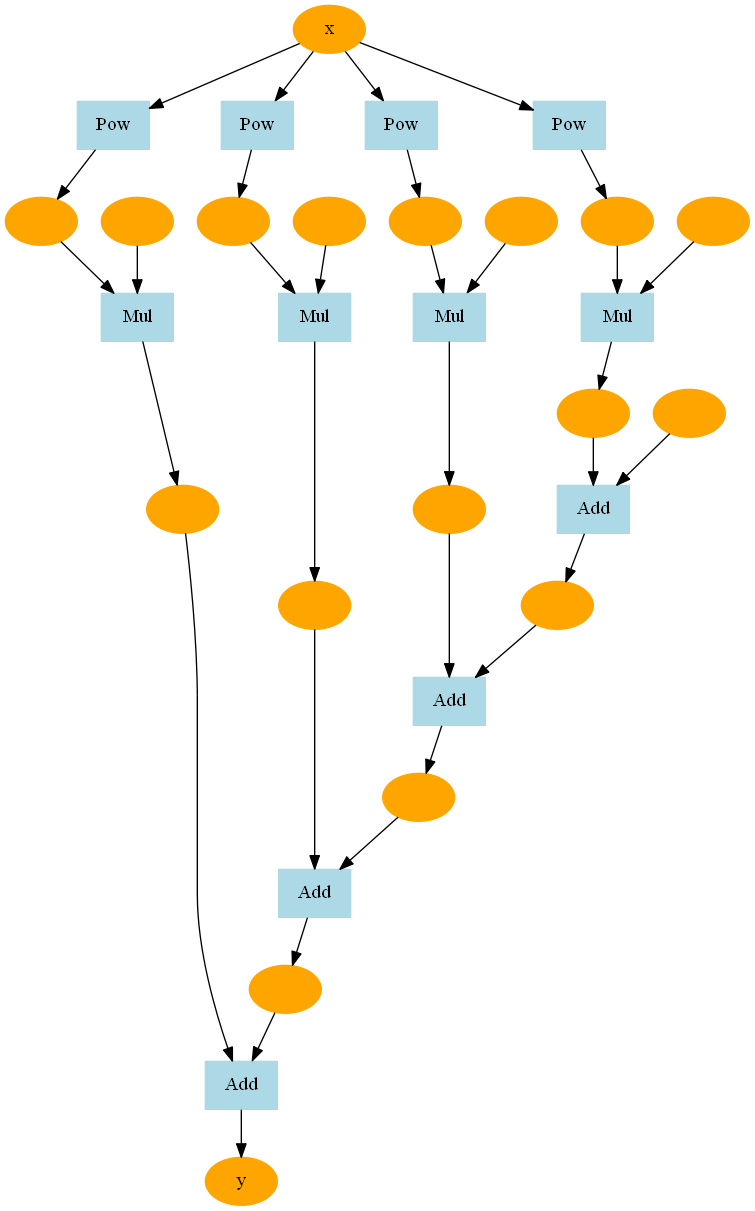

In [2]:
# 테일러 급수 미분
# 테일러 급수란 어떤 함수를 다항식으로 근사하는 방법.
if '__file__' in globals():
    import os, sys
    sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
    
import numpy as np
import math
from dezero import Variable, Function
from dezero.utils import plot_dot_graph


class Sin(Function):            # sin 함수 구현
    def forward(self, x):
        y = np.sin(x)
        return y

    def backward(self, gy):
        x = self.inputs[0].data
        gx = gy * np.cos(x)
        return gx


def sin(x):
    return Sin()(x)


x = Variable(np.array(np.pi / 4))
y = sin(x)
y.backward()
print('--- original sin ---')
print(y.data)
print(x.grad)


def my_sin(x, threshold=0.0001):        # 식 27.3에 따라 sin 함수 구현
    y = 0
    for i in range(100000):
        c = (-1) ** i / math.factorial(2 * i + 1)
        t = c * x ** (2 * i + 1)
        y = y + t
        if abs(t.data) < threshold:
            break
    return y


x = Variable(np.array(np.pi / 4))
y = my_sin(x)  # , threshold=1e-150)
y.backward()
print('--- approximate sin ---')
print(y.data)
print(x.grad)

x.name = 'x'
y.name = 'y'
plot_dot_graph(y, verbose=False, to_file='my_sin.png')

![식 27.3](./img/27.3.png)

![그림 27-2](./img/27-2.png)